In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import time

3. Data, variabel data yang Anda gunakan.

In [ ]:
fileLocation= '../Data Science/IPM.csv'
data = pd.read_csv(fileLocation)

## untuk dataset nya bisa di lihat dari link ini ya https://drive.google.com/drive/folders/1mR4nOw5v8QsNztLYw8c6vz8fqzLF8fN5?usp=share_link ##

 4. Preprocessing data yang Anda lakukan beserta interpretasi.

In [ ]:
data.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


In [ ]:
data.tail()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High
2195,12.91,11059,8.17,71.20,High


Program menampilkan 5 data teratas yang ada di dataset IPM

In [ ]:
data.shape

(2196, 5)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [ ]:
data.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


In [ ]:
data.nunique()

Harapan_Lama_Sekolah      499
Pengeluaran_Perkapita    1930
Rerata_Lama_Sekolah       633
Usia_Harapan_Hidup       1054
IPM                         4
dtype: int64

Menampilkan value pada setiap variabel data set ke 5 yaitu 4 atau IPM

In [ ]:
data_cat = data[['IPM']]

Mengelompokan variabel kategorik


In [ ]:
data_cat

,IPM
0,High
1,Normal
2,Normal
3,Normal
4,Normal
...,...
2191,Low
2192,Low
2193,Low
2194,High


5. Model dan parameter model yang Anda gunakan.

In [ ]:
for i in data_cat.columns:
    print(data_cat[i].value_counts())

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64


<AxesSubplot: xlabel='Pengeluaran_Perkapita', ylabel='count'>

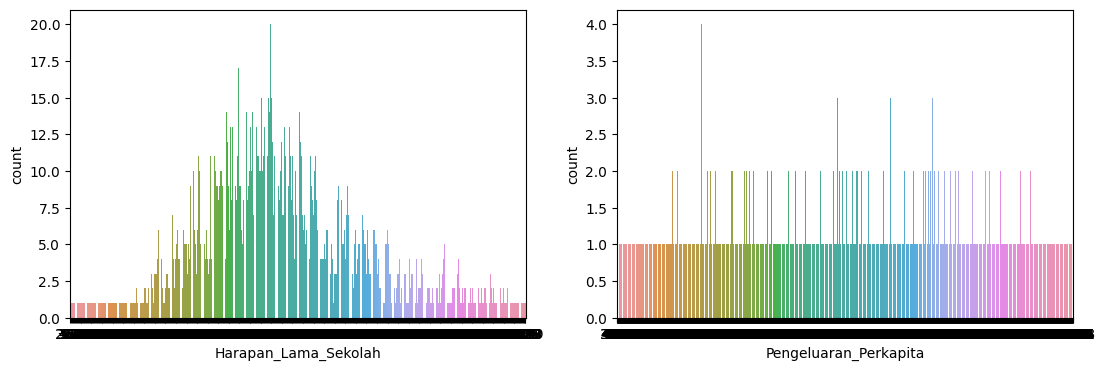

In [ ]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.countplot(x=data['Harapan_Lama_Sekolah'])

f.add_subplot(1,3,2)
sns.countplot(x=data['Pengeluaran_Perkapita'])

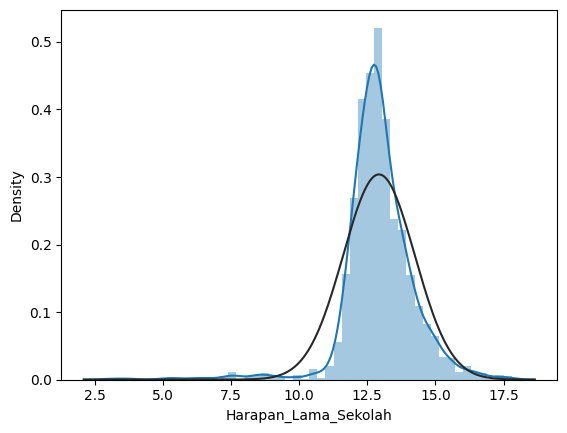

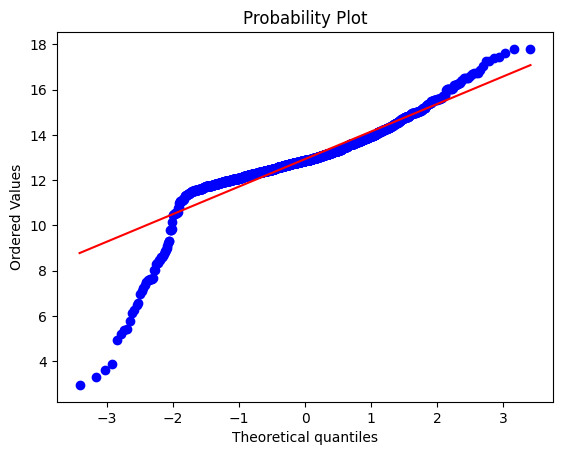

In [ ]:
from scipy import stats
from scipy.stats import norm
sns.distplot(data['Harapan_Lama_Sekolah'],fit=norm)
fig = plt.figure()
res = stats.probplot(data['Harapan_Lama_Sekolah'], plot=plt)

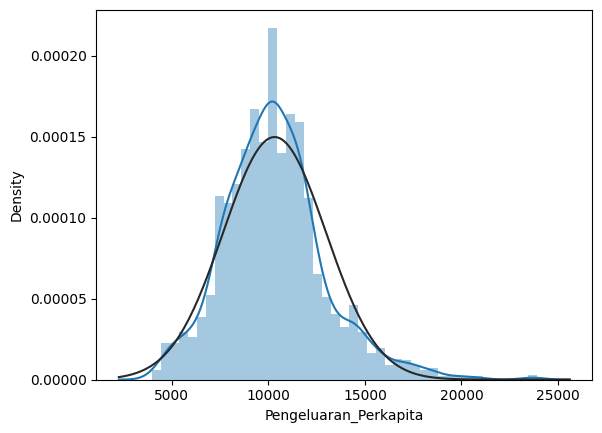

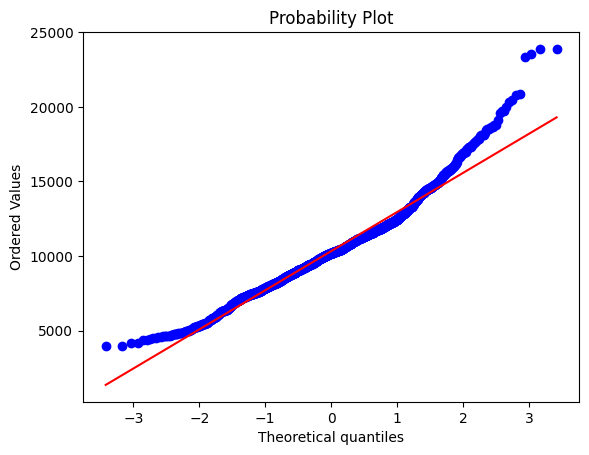

In [ ]:
from scipy import stats
from scipy.stats import norm
sns.distplot(data['Pengeluaran_Perkapita'],fit=norm)
fig = plt.figure()
res = stats.probplot(data['Pengeluaran_Perkapita'], plot=plt)

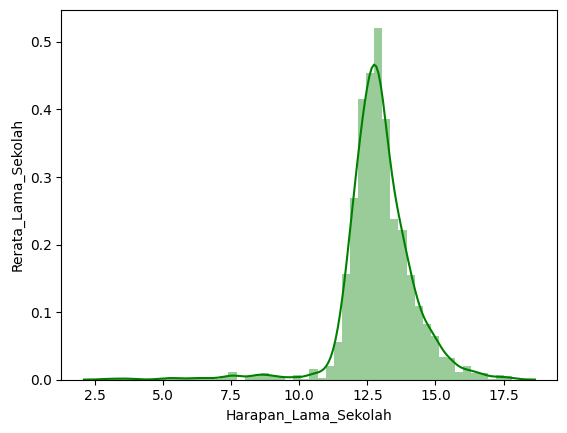

In [ ]:

sns.distplot(data['Harapan_Lama_Sekolah'], color='g')
plt.ylabel('Rerata_Lama_Sekolah')
plt.show()



6. Ukuran kebaikan model yang dihasilkan (jika melakukan komparasi model juga ditampilkan)

Modeling menggunakan Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [ ]:
X = data.drop(['IPM'],axis = 1)
y = data['IPM']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((1471, 4), (725, 4))

Membagi data training dan test dengan rasio 33% datadigunakan sebagai data testing denganpemilihan random state sebesar 42 hingga diperoleh dimensi dari datatraining nya sebanyak 1471 dan data testing 725

In [ ]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [ ]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
from sklearn.pipeline import make_pipeline
classifier_rf = RandomForestClassifier (n_estimators=10,
                                 max_features=5,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
#
# Fit the Random Forest classifier
#
classifier_rf.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %classifier_rf.score(X_test, y_test),
      'Model training Score: %.3f' %classifier_rf.score(X_train, y_train))

Model test Score: 0.912,  Model training Score: 0.920


In [ ]:
start_time = time.time()
classifier_rf.fit(X_train, y_train)
end_time = time.time()
print("Waktu pelatihan: {:.3f} detik".format(end_time - start_time))

Waktu pelatihan: 0.039 detik


Modeling dengan BaggingClassifier


In [ ]:
from sklearn.ensemble import BaggingClassifier
bgclassifier = BaggingClassifier()
bgclassifier.fit(X_train, y_train)

SyntaxError: invalid syntax (2236552160.py, line 2)

In [ ]:
bgclassifier = BaggingClassifier (n_estimators=10,
                                 max_features=1,
                                 max_samples=100,
                                 random_state=15, n_jobs=5 c)

In [ ]:
from sklearn.pipeline import make_pipeline

#
# Fit the bagging classifier
#
bgclassifier.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

Model test Score: 0.968,  Model training Score: 0.997


In [ ]:
start_time = time.time()
bgclassifier.fit(X_train, y_train)
end_time = time.time()
print("Waktu pelatihan: {:.3f} detik".format(end_time - start_time))

Waktu pelatihan: 0.025 detik


Kesimpulan


Kesimpulan nya adalah jika program menggunakan modeling random forest hasil dari skor model dan skor training nya akan lebih akurat atau besar dari bagging classifier 

namun waktu yang dibutuhkan sedikit lebih lama dari bagging classifier yaitu 0.063 detik.

Dan jika menggunakan modeling bagging classifier,skor model dan skor training lebih kecil skor nya di banding menggunakan random forest

namun waktu yang diperlukan sedikit lebih cepat dari random forest yaitu 0.0025 detik
